# Loading Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV
import sklearn.metrics as metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
import json
from sklearn.tree import export_graphviz
from IPython.display import Image
from IPython.display import display
from IPython.display import display, Math, Latex
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.width', 450)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn.apionly as sns
sns.set_style("whitegrid")

c0=sns.color_palette()[0]
c1=sns.color_palette()[1]
c2=sns.color_palette()[2]

# Loading Data via function line by line
<font color='green'>

### As we have large amounf data so we are loading data line by line in dataframe business_df, review_df, user_df

In [2]:
import json

def readjson(filepath):
    data = []
    i=0
    with open(filepath,encoding="utf8") as f:
            for line in f:
                 if i<100000:
                    data.append(json.loads(line))
                    #print(i)
                    i +=1
    return pd.DataFrame(data)

business_df = readjson('./dataset/business.json')
review_df = readjson('./dataset/review.json')
user_df = readjson('./dataset/user.json')

# Filtering data
<font color='green'>
### Getting reaturants out of business dataframe based on Food category

In [3]:
business_df['categories'] = business_df['categories'].astype(str)
restaurant_df = business_df[business_df['categories'].str.contains('Food')==True]

complete_df = restaurant_df.merge(review_df,on='business_id').merge(user_df,on='user_id')


In [4]:
complete_df.head(2)

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name_x,neighborhood,postal_code,review_count_x,stars_x,state,cool_x,date,funny_x,review_id,stars_y,text,useful_x,user_id,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,compliment_profile,compliment_writer,cool_y,elite,fans,friends,funny_y,name_y,review_count_y,useful_y,yelping_since
0,"1203 E Charleston Blvd, Ste 140","{'RestaurantsTableService': True, 'GoodForMeal...",YTqtM2WFhcMZGeAGA08Cfg,"['Seafood', 'Restaurants', 'Specialty Food', '...",Las Vegas,"{'Monday': '10:30-21:00', 'Tuesday': '10:30-21...",1,36.159363,-115.135949,Mariscos Playa Escondida,Downtown,89104,330,4.5,NV,0,2016-09-16,1,ZH8g_PoY0Tr3YdQ-RGySrA,5,Great place. There was a man here who was very...,1,EDe16577dBImA1ypOzPlKg,5.00,0,0,0,0,0,0,0,0,0,0,0,0,[],0,[],0,Jessica,1,0,2014-07-26
1,"1203 E Charleston Blvd, Ste 140","{'RestaurantsTableService': True, 'GoodForMeal...",YTqtM2WFhcMZGeAGA08Cfg,"['Seafood', 'Restaurants', 'Specialty Food', '...",Las Vegas,"{'Monday': '10:30-21:00', 'Tuesday': '10:30-21...",1,36.159363,-115.135949,Mariscos Playa Escondida,Downtown,89104,330,4.5,NV,1,2014-11-13,1,6r2uAJE1dqUq1IHn_3R3qA,4,HOT HOT HOT! Real Mexican Food\n\nNO fake wate...,2,twx2ZgFUbat87vGQ_tFbPA,3.55,0,0,0,2,0,1,3,0,5,0,0,11,[],3,"[eFObFWgDiQJwUiy9WlhOfg, W4KL3Q_AVGfRrWcwR60gK...",29,Edwin,94,317,2010-12-30


In [5]:
restaurant_df.describe()

,is_open,latitude,longitude,review_count,stars
count,18503.00000,18503.000000,18503.000000,18503.000000,18503.000000
mean,0.83073,39.702568,-87.807760,34.804464,3.546857
std,0.37500,5.747548,27.691971,82.946472,0.889710
min,0.00000,-34.520401,-119.551325,3.000000,1.000000
25%,1.00000,35.135615,-112.013439,5.000000,3.000000
50%,1.00000,40.440368,-81.357777,11.000000,3.500000
75%,1.00000,43.665419,-79.414244,31.000000,4.000000
max,1.00000,59.438181,11.769500,3439.000000,5.000000


In [6]:
user_df.describe()

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,compliment_profile,compliment_writer,cool,fans,funny,review_count,useful
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,3.729684,16.342210,0.950070,16.342210,12.015470,0.416970,1.465460,6.980040,5.491070,15.870480,1.046280,6.151540,91.215580,5.103230,64.731610,66.524450,120.838970
std,0.835715,197.424646,16.639768,197.424646,175.458886,7.165452,15.762362,70.410324,153.225409,194.113025,19.474635,73.883346,1509.129416,29.803631,1049.502721,178.975429,1610.123217
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.350000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
50%,3.810000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,2.000000
75%,4.240000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000,2.000000,3.000000,50.000000,13.000000
max,5.000000,16710.000000,2146.000000,16710.000000,19988.000000,1265.000000,1576.000000,6340.000000,33297.000000,13075.000000,2232.000000,7117.000000,175230.000000,1837.000000,103514.000000,11065.000000,187179.000000


In [7]:
review_df.describe()

,cool,funny,stars,useful
count,100000.000000,100000.000000,100000.000000,100000.00000
mean,0.532470,0.411740,3.730530,1.01213
std,1.992121,1.655608,1.418456,2.46252
min,0.000000,0.000000,1.000000,0.00000
25%,0.000000,0.000000,3.000000,0.00000
50%,0.000000,0.000000,4.000000,0.00000
75%,0.000000,0.000000,5.000000,1.00000
max,104.000000,114.000000,5.000000,113.00000


In [8]:
review_df.head(2)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,uYHaNptLzDLoV_JZ_MuzUA,0,2016-07-12,0,VfBHSwC5Vz_pbFluy07i9Q,5,My girlfriend and I stayed here for 3 nights a...,0,cjpdDjZyprfyDG3RlkVG3w
1,uYHaNptLzDLoV_JZ_MuzUA,0,2016-10-02,0,3zRpneRKDsOPq92tq7ybAA,3,If you need an inexpensive place to stay for a...,0,bjTcT8Ty4cJZhEOEo01FGA


In [9]:
user_df.head(2)

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,compliment_profile,compliment_writer,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
0,3.80,5174,284,5174,5175,78,299,1435,7829,7397,569,1834,16856,"[2014, 2016, 2013, 2011, 2012, 2015, 2010, 2017]",209,"[M19NwFwAXKRZzt8koF11hQ, QRcMZ8pJJBBZaKubHOoMD...",16605,Cin,272,17019,lsSiIjAKVl-QRxKjRErBeg,2010-07-13
1,3.94,1556,211,1556,1285,101,134,1295,162,2134,74,402,40110,"[2014, 2017, 2011, 2012, 2015, 2009, 2013, 200...",835,"[eoSSJzdprj3jxXyi94vDXg, QF0urZa-0bxga17ZeY-9l...",10882,Andrea,2559,83681,om5ZiponkpRqUNa3pVPiRg,2006-01-18


# EDA
<font color='green'>
### Performing Exploratory data analysis

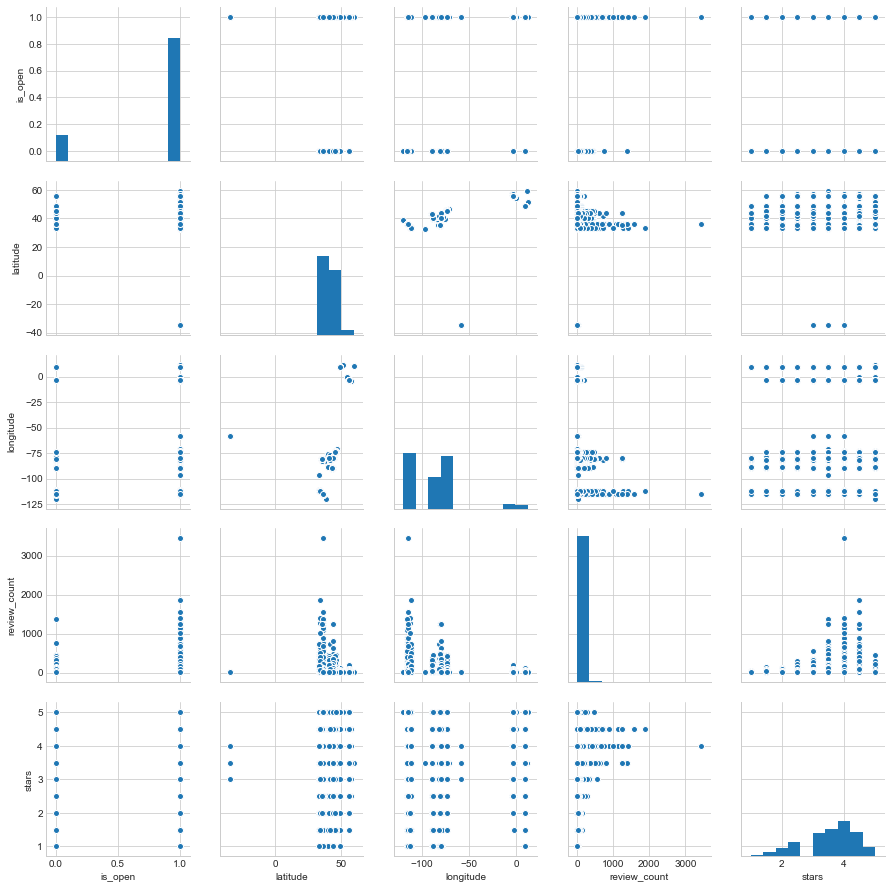

In [10]:
sns.pairplot(restaurant_df.iloc[0:10000,:]);

## Distribution count of Restaurant rating 
<font color='green'>
### We can see below more restaurants get 4 rating than other ratings

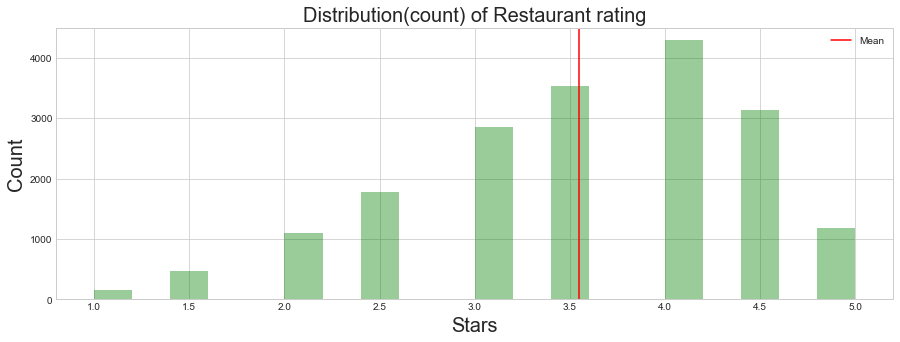

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

sns.distplot(restaurant_df.stars,kde=False,color = 'g',ax =ax,bins=20);
ax.axvline(restaurant_df.stars.mean(), 0, 1, color='r', label='Mean')
ax.legend();
ax.set_ylabel('Count',size=20)
ax.set_xlabel('Stars',size=20)
ax.set_title('Distribution(count) of Restaurant rating',size=20);

## Distribution count of Reviews rating for restaurants 
<font color='green'>
### We can see below more reviews have 5 rating than other ratings

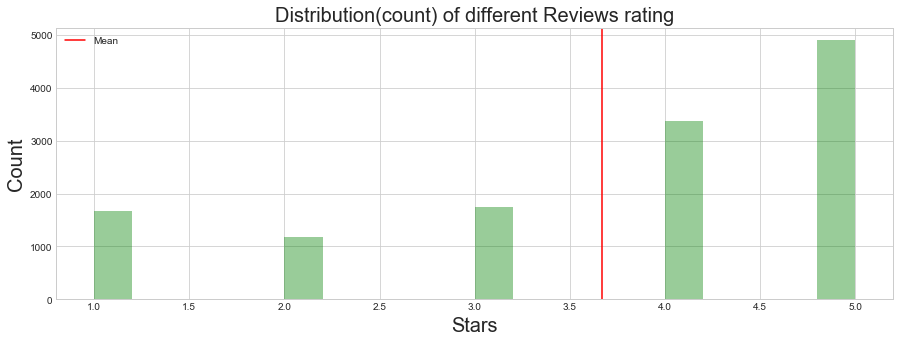

In [12]:
#review just for business which are restautrant
review_df_filter_df = review_df.merge(restaurant_df,how='inner',on='business_id')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))
sns.distplot(review_df_filter_df.stars_x,kde=False,color = 'g',ax =ax,bins=20);
ax.axvline(review_df_filter_df.stars_x.mean(), 0, 1, color='r', label='Mean')
ax.legend();
ax.set_ylabel('Count',size=20)
ax.set_xlabel('Stars',size=20)
ax.set_title('Distribution(count) of different Reviews rating',size=20)

## Distribution count of user rating for restaurants 
<font color='green'>
### We can see below  users have around mean of 3.7  rating

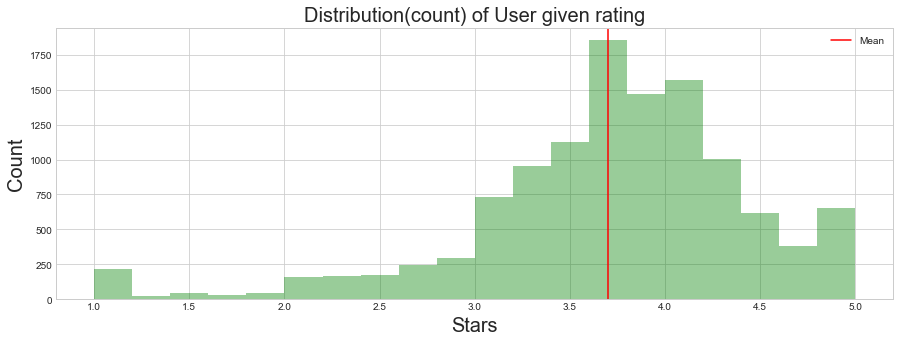

In [13]:
#user just for business which are restautrant
user_df_filter_df = complete_df.groupby(['user_id'],as_index=False).mean()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))
sns.distplot(user_df_filter_df.average_stars,kde=False,color = 'g',ax =ax,bins=20);
ax.axvline(user_df_filter_df.average_stars.mean(), 0, 1, color='r', label='Mean')
ax.legend();
ax.set_ylabel('Count',size=20)
ax.set_xlabel('Stars',size=20)
ax.set_title('Distribution(count) of User given rating',size=20)

#fig.tight_layout()

## Scatter plot various features 
<font color='green'>
### We can see that useful, funny and cool are correlated 

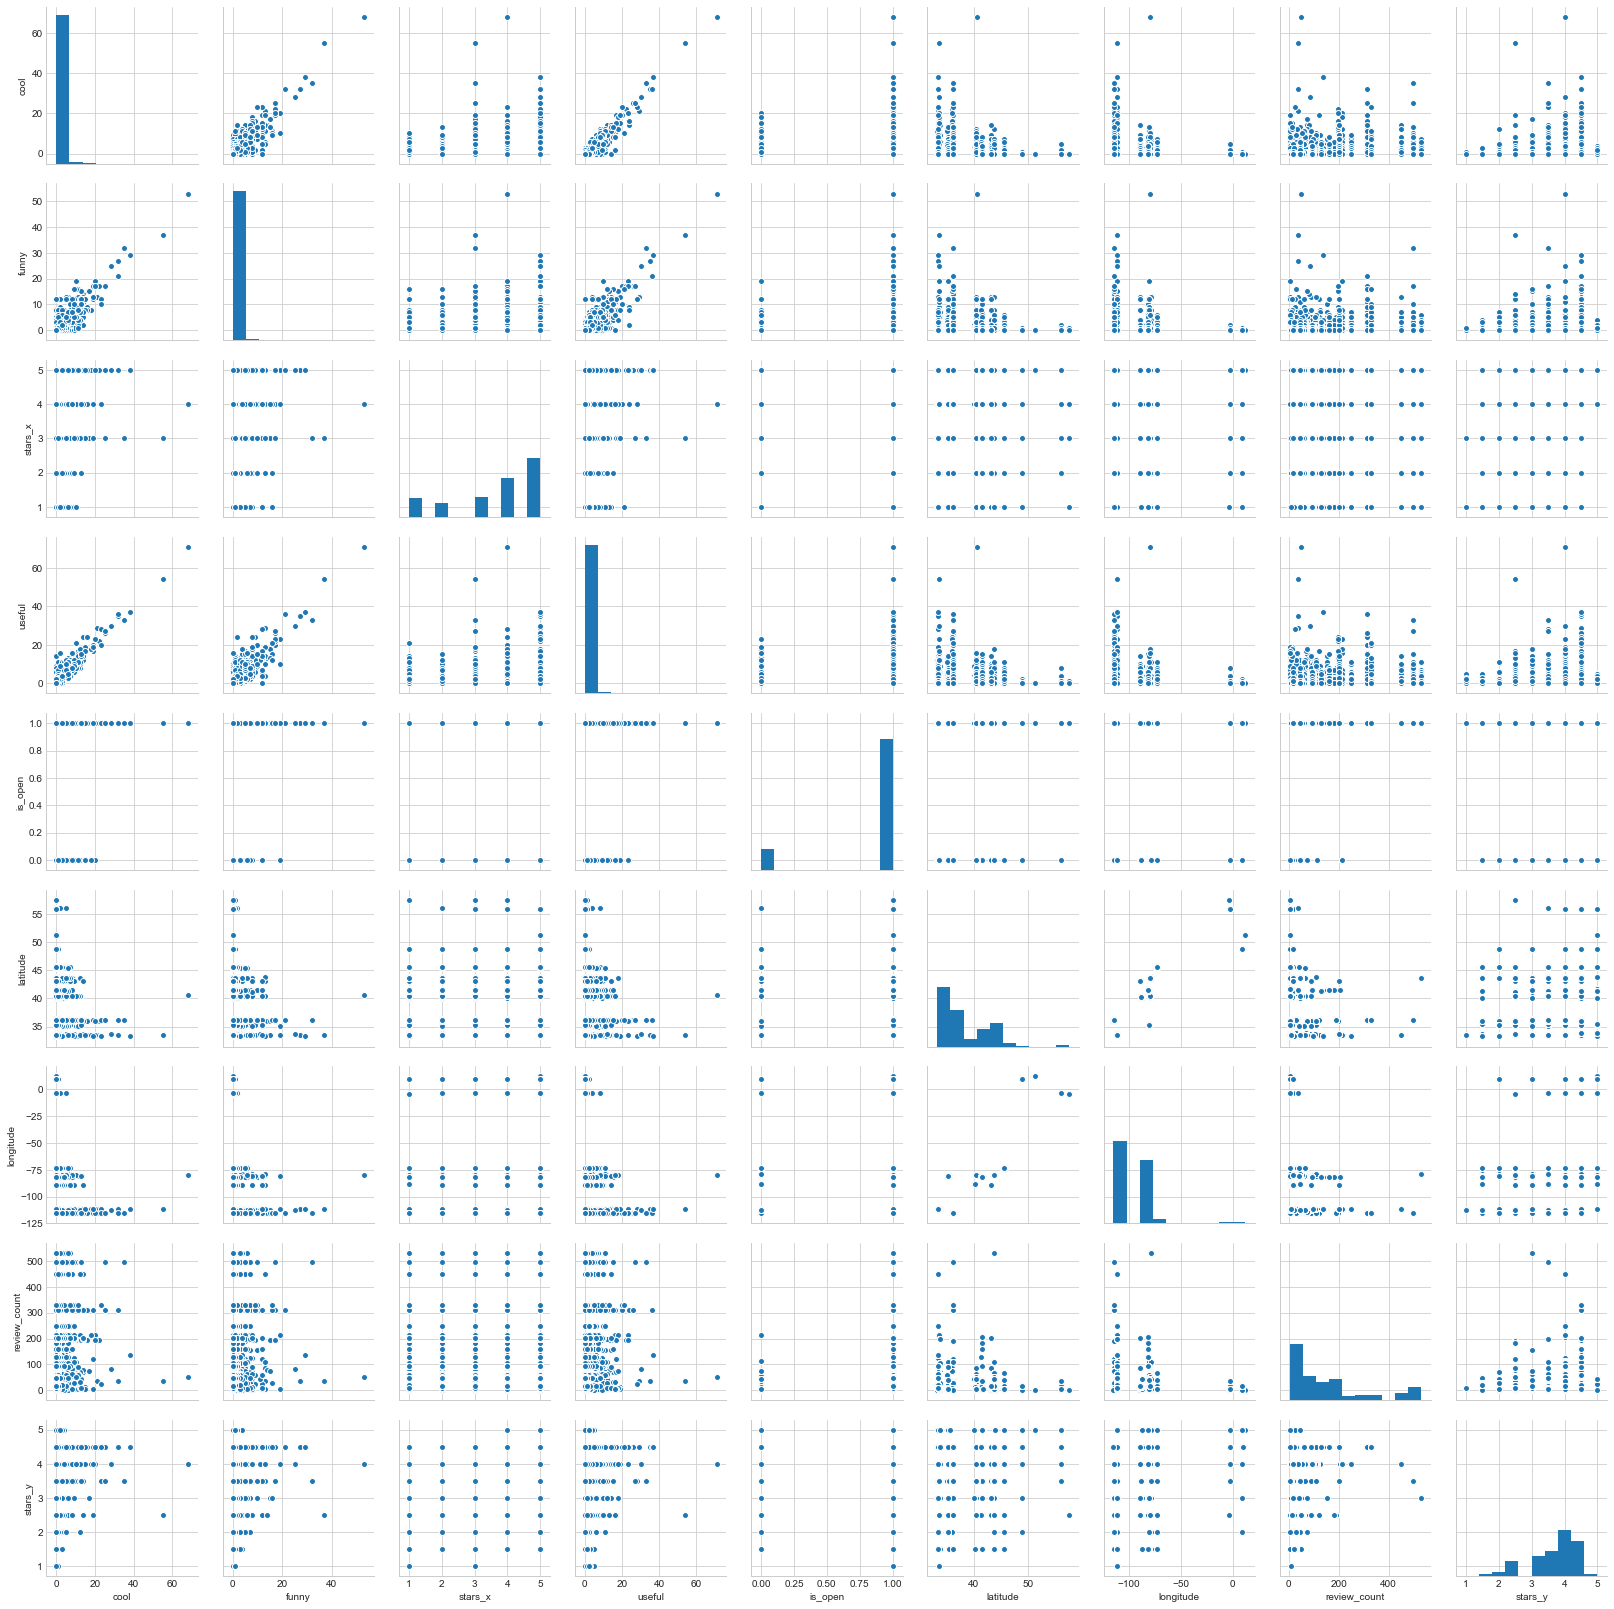

In [14]:
sns.pairplot(review_df_filter_df.iloc[0:10000,:]);


## Most Reviewed Restaurant
<font color='green'>
### Bouchon at the Venezia Tower is reviewed almost double as compared to others

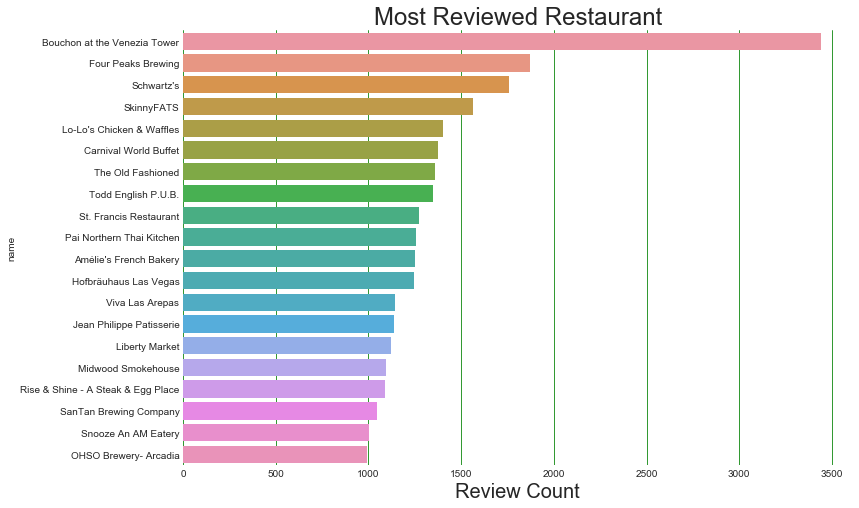

In [15]:
#get top 20 most reviewed restaurants
n_top =20
most_reviewed_restaurant = restaurant_df.nlargest(n_top, 'review_count')
fig, ax = plt.subplots()
ax = sns.barplot(y="name", x="review_count", data=most_reviewed_restaurant)
ax.set_xlabel('Review Count',size=20)
fig.set_size_inches(12, 8)
plt.title("Most Reviewed Restaurant",fontsize=24);
ax.grid(axis = 'x', color ='green', linestyle='-')
ax.tick_params(axis='both', which='both',length=0)
sns.despine(left=True, bottom=True)


## Top 10 5 star rated Restaurant
<font color='green'>
### Poke Express is the top 5 star rated restaurant

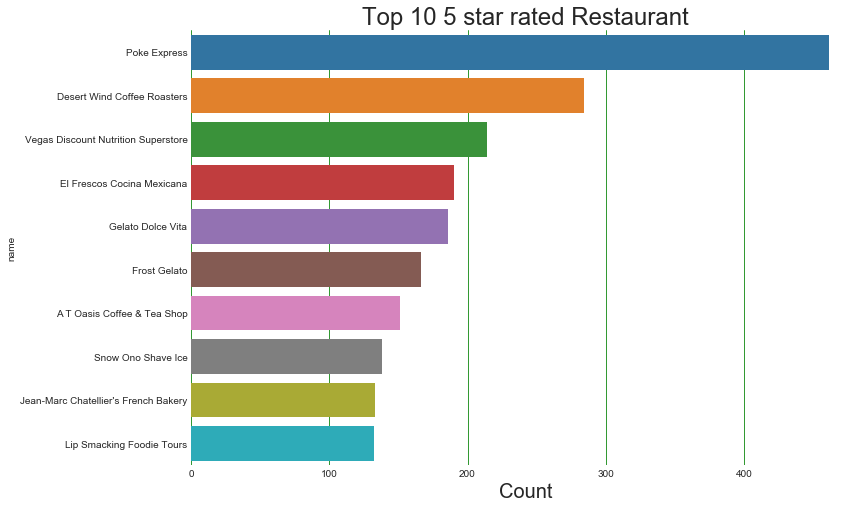

In [16]:
top_rated_restaurant = restaurant_df.sort_values(by=['stars','review_count'],
                                                 ascending=False)[['name','business_id','review_count','stars']]
#get top 10 5 star rated restaurant
n_top =10
top_rated_restaurant = top_rated_restaurant.nlargest(n_top, 'stars')
fig, ax = plt.subplots()
ax = sns.barplot(y="name", x="review_count", data=top_rated_restaurant)
ax.set_xlabel('Count',size=20)
fig.set_size_inches(12, 8)
plt.title("Top 10 5 star rated Restaurant",fontsize=24);
ax.grid(axis = 'x', color ='green', linestyle='-')
ax.tick_params(axis='both', which='both',length=0)
sns.despine(left=True, bottom=True)

<font color='green'>
### Getting different food categories from the restaurant dataframe

In [17]:
top_rated_restaurant = restaurant_df.sort_values(by=['stars','review_count'],
                                                 ascending=False)[['name','business_id','review_count','stars']]
#top_rated_restaurant

In [18]:
def get_food_type_count(category):
    count = restaurant_df[restaurant_df['categories'].str.contains(category)==True]['business_id'].count()
    return count


In [19]:
food_dict = {}
food_categories = ['American','Italian','Mexican','Chinese','Thai','Indian','Japan','French']
for food_category in food_categories:
    food_dict[food_category] = get_food_type_count(food_category)
    


## Distribution of review count with respect to Food Categories
<font color='green'>
### We can see American restaurant have higher count of reviews followed by Mexican

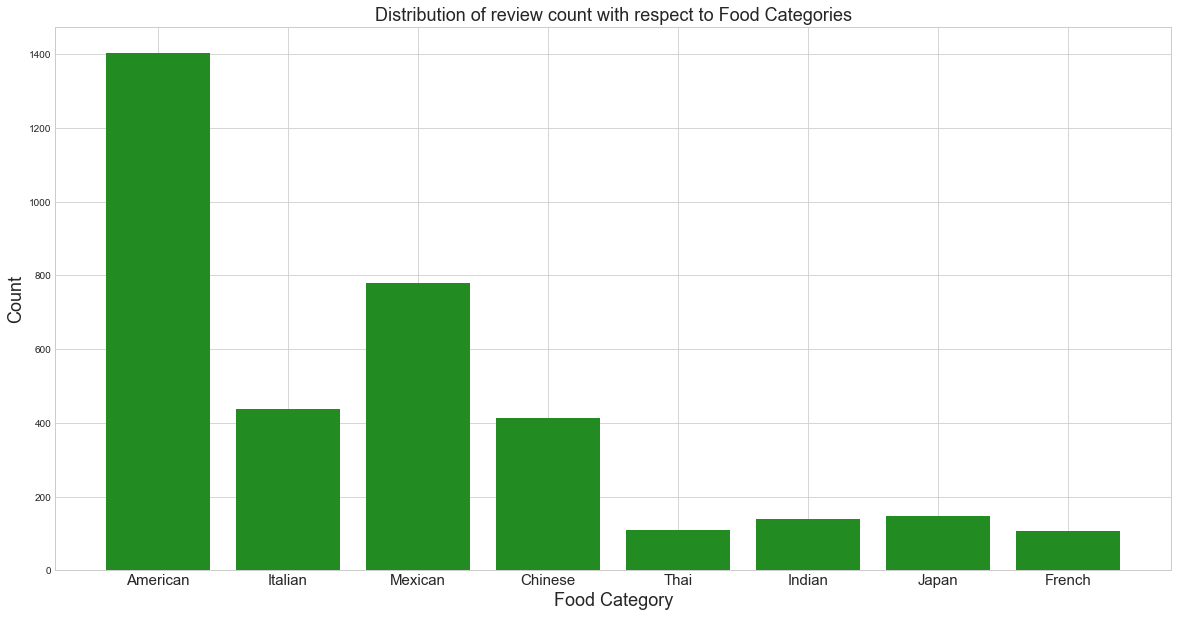

In [20]:
plt.figure(figsize=(20,10))
plt.bar(range(len(food_dict)), food_dict.values(), align='center',color='forestgreen')
plt.xticks(range(len(food_dict)), list(food_dict.keys()),fontsize = 15);
plt.title('Distribution of review count with respect to Food Categories',fontsize=18)
plt.xlabel('Food Category',fontsize=18)
plt.ylabel('Count',fontsize=18)


## Distribution(count) of American, Mexican, Italian, Chinese Restaurant rating
<font color='green'>
### We can see American and Italian restaurants are rated higher than other restaurants

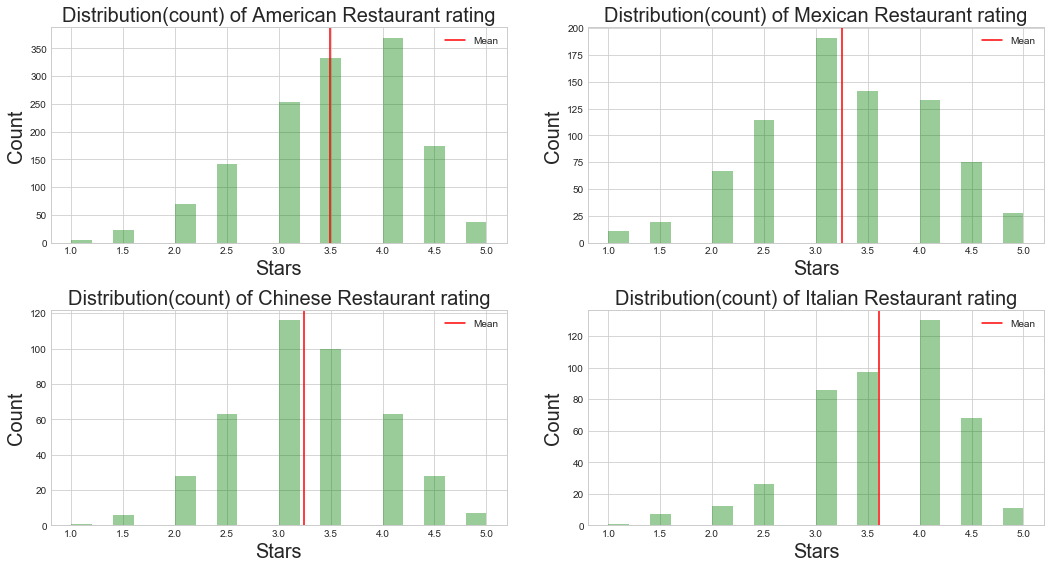

In [21]:
American_restaurant_rating_df = restaurant_df[restaurant_df['categories'].str.contains('American')==True][['business_id','stars','categories','name','review_count']]
Mexican_restaurant_rating_df = restaurant_df[restaurant_df['categories'].str.contains('Mexican')==True][['business_id','stars','categories','name','review_count']]
Chinese_restaurant_rating_df = restaurant_df[restaurant_df['categories'].str.contains('Chinese')==True][['business_id','stars','categories','name','review_count']]
Italian_restaurant_rating_df = restaurant_df[restaurant_df['categories'].str.contains('Italian')==True][['business_id','stars','categories','name','review_count']]

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))
ax = ax.ravel()

def restaurant_category(df, title, ax):

    sns.distplot(df.stars,kde=False,color = 'g',ax =ax,bins=20);
    ax.axvline(df.stars.mean(), 0, 1, color='r', label='Mean')
    ax.legend();
    ax.set_ylabel('Count',size=20)
    ax.set_xlabel('Stars',size=20)
    ax.set_title('Distribution(count) of '+ title + ' Restaurant rating',size=20);

restaurant_category(American_restaurant_rating_df, 'American', ax[0])
restaurant_category(Mexican_restaurant_rating_df, 'Mexican', ax[1])
restaurant_category(Chinese_restaurant_rating_df, 'Chinese', ax[2])
restaurant_category(Italian_restaurant_rating_df, 'Italian', ax[3])

plt.tight_layout()

In [22]:
American_restaurant_rating_df.head(2)

,business_id,stars,categories,name,review_count
34,reWc1g65PNZnKz_Ub9QKOQ,2.5,"['Comfort Food', 'Canadian (New)', 'Restaurant...",Milestones Restaurants,51
55,Z1r6b30Tg0n0ME4-Zj2wQQ,3.0,"['American (Traditional)', 'Restaurants', 'Bar...",Boardwalk Place,13


## Top 20 American 5 star rated Restaurant

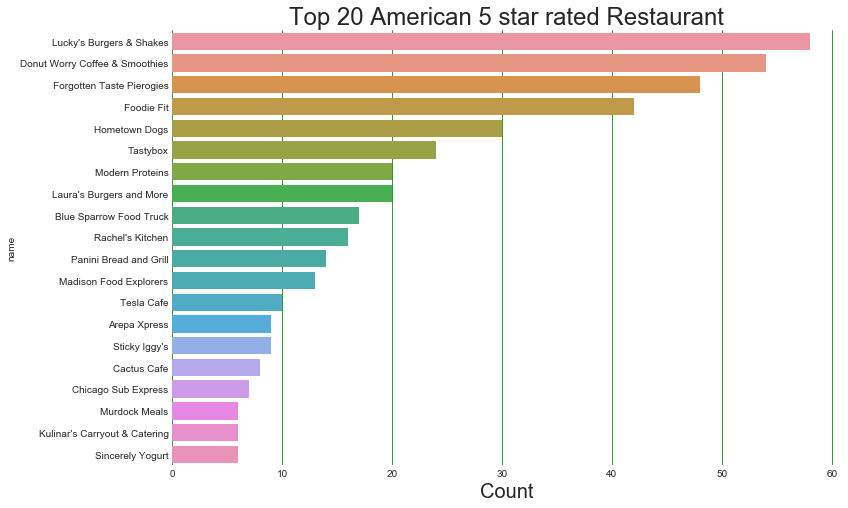

In [23]:
American_top_rated_restaurant = American_restaurant_rating_df.sort_values(by=['stars','review_count'],
                                                 ascending=False)[['name','business_id','review_count','stars']]
#get top 20 5 star rated restaurant
n_top =20
American_top_rated_restaurant = American_top_rated_restaurant.nlargest(n_top, 'stars')
fig, ax = plt.subplots()
ax = sns.barplot(y="name", x="review_count", data=American_top_rated_restaurant)
ax.set_xlabel('Count',size=20)
fig.set_size_inches(12, 8)
plt.title("Top 20 American 5 star rated Restaurant",fontsize=24);
ax.grid(axis = 'x', color ='green', linestyle='-')
ax.tick_params(axis='both', which='both',length=0)
sns.despine(left=True, bottom=True)

## High-count Top 10 users who reviewed Restaurant

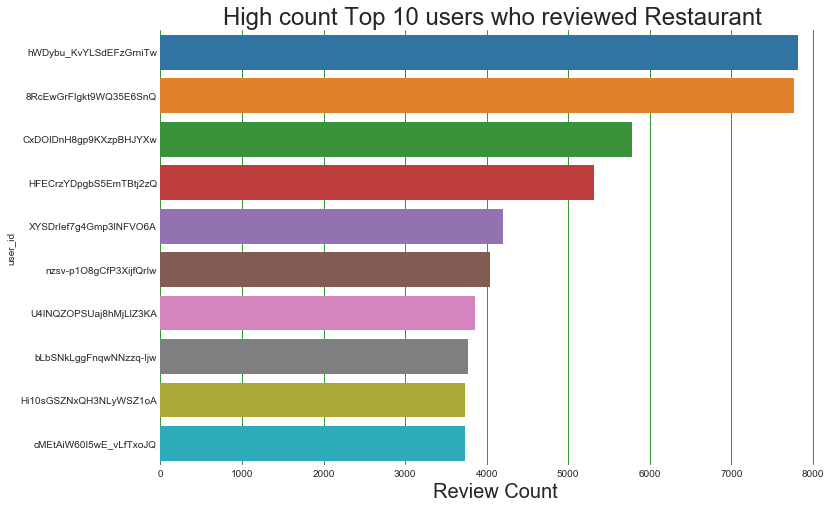

In [24]:

#get top 10 most reviewing users
n_top =10
most_review_user = user_df_filter_df.nlargest(n_top, 'review_count_y').reindex()
fig, ax = plt.subplots()
ax = sns.barplot(y="user_id", x="review_count_y", data=most_review_user)
ax.set_xlabel('Review Count',size=20)
fig.set_size_inches(12, 8)
plt.title("High count Top 10 users who reviewed Restaurant ",fontsize=24);
ax.grid(axis = 'x', color ='green', linestyle='-')
ax.tick_params(axis='both', which='both',length=0)
sns.despine(left=True, bottom=True)


## Distribution of Review Count given by users and given to Restaurant
<font color='green'>
### We can see that most review count is with less number of users and restaurants

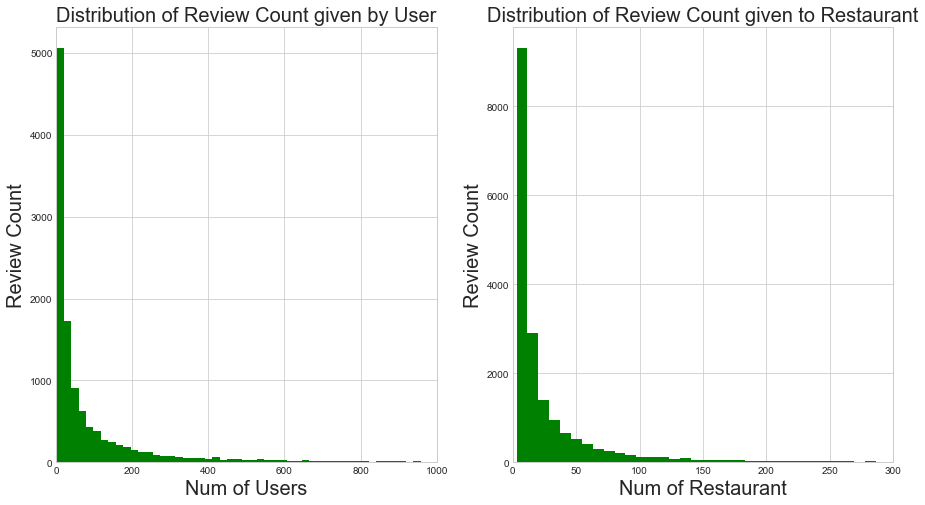

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))
user_df_filter_df.review_count_y.hist(bins=400,ax=ax[0],color = 'g')
#plt.xlim([0,1000])
ax[0].legend();
ax[0].set_xlim([0,1000])
ax[0].set_ylabel('Review Count',size=20)
ax[0].set_xlabel('Num of Users',size=20)
ax[0].set_title('Distribution of Review Count given by User',size=20);

restaurant_df.review_count.hist(bins=400,ax=ax[1],color = 'g')
ax[1].set_xlim([0,300])
ax[1].legend();
ax[1].set_ylabel('Review Count',size=20)
ax[1].set_xlabel('Num of Restaurant',size=20)
ax[1].set_title('Distribution of Review Count given to Restaurant',size=20);


##  Creating Baseline Model

In [26]:
complete_df.head(2)

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name_x,neighborhood,postal_code,review_count_x,stars_x,state,cool_x,date,funny_x,review_id,stars_y,text,useful_x,user_id,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,compliment_profile,compliment_writer,cool_y,elite,fans,friends,funny_y,name_y,review_count_y,useful_y,yelping_since
0,"1203 E Charleston Blvd, Ste 140","{'RestaurantsTableService': True, 'GoodForMeal...",YTqtM2WFhcMZGeAGA08Cfg,"['Seafood', 'Restaurants', 'Specialty Food', '...",Las Vegas,"{'Monday': '10:30-21:00', 'Tuesday': '10:30-21...",1,36.159363,-115.135949,Mariscos Playa Escondida,Downtown,89104,330,4.5,NV,0,2016-09-16,1,ZH8g_PoY0Tr3YdQ-RGySrA,5,Great place. There was a man here who was very...,1,EDe16577dBImA1ypOzPlKg,5.00,0,0,0,0,0,0,0,0,0,0,0,0,[],0,[],0,Jessica,1,0,2014-07-26
1,"1203 E Charleston Blvd, Ste 140","{'RestaurantsTableService': True, 'GoodForMeal...",YTqtM2WFhcMZGeAGA08Cfg,"['Seafood', 'Restaurants', 'Specialty Food', '...",Las Vegas,"{'Monday': '10:30-21:00', 'Tuesday': '10:30-21...",1,36.159363,-115.135949,Mariscos Playa Escondida,Downtown,89104,330,4.5,NV,1,2014-11-13,1,6r2uAJE1dqUq1IHn_3R3qA,4,HOT HOT HOT! Real Mexican Food\n\nNO fake wate...,2,twx2ZgFUbat87vGQ_tFbPA,3.55,0,0,0,2,0,1,3,0,5,0,0,11,[],3,"[eFObFWgDiQJwUiy9WlhOfg, W4KL3Q_AVGfRrWcwR60gK...",29,Edwin,94,317,2010-12-30


<font color='green'>
#### Taking only user_id, business_id, stars_y and using the surprise library(https://pypi.python.org/pypi/scikit-surprise)
Algorithm predicting the baseline estimate for given user and item.

In [27]:
display(Math('r^ui=bui=μ+bu+bi'))

<IPython.core.display.Math object>

In [28]:
baseline_df = complete_df[['user_id','business_id','stars_y']]

In [29]:
from surprise import SVD,BaselineOnly, Reader,KNNBaseline
from surprise import Dataset
from surprise import Reader
from surprise import evaluate, print_perf

reader = Reader(rating_scale=(1, 5))
# Load the dataset
# and split it into 3 folds for cross-validation.
data = Dataset.load_from_df(baseline_df,reader)
data.split(n_folds=3)

### BaselineOnly Model

In [30]:
# Baselineonly model
algo = BaselineOnly()
# Performance
perf = evaluate(algo, data, measures=['RMSE', 'MAE'])
print_perf(perf)

Evaluating RMSE, MAE of algorithm BaselineOnly.

------------
Fold 1
Estimating biases using als...
RMSE: 1.2529
MAE:  1.0208
------------
Fold 2
Estimating biases using als...
RMSE: 1.2463
MAE:  1.0155
------------
Fold 3
Estimating biases using als...
RMSE: 1.2420
MAE:  1.0058
------------
------------
Mean RMSE: 1.2471
Mean MAE : 1.0140
------------
------------
        Fold 1  Fold 2  Fold 3  Mean    
RMSE    1.2529  1.2463  1.2420  1.2471  
MAE     1.0208  1.0155  1.0058  1.0140  


### KNNBaseline Model

<font color = 'green'>
#### KNN Based on user restaurant rating

In [31]:
display(Math(r'\hat{r}_{ui} = \mu_u + \sigma_u \frac{ \sum\limits_{v \in N^k_i(u)}\text{sim}(u, v) \cdot (r_{vi} - \mu_v) / \sigma_v} {\sum\limits_{v\in N^k_i(u)} \text{sim}(u, v)}'))


<IPython.core.display.Math object>

In [32]:
# KNNBaseline model
algo = KNNBaseline()

# Performance
perf = evaluate(algo, data, measures=['RMSE', 'MAE'])
print_perf(perf)

Evaluating RMSE, MAE of algorithm KNNBaseline.

------------
Fold 1
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.2573
MAE:  1.0241
------------
Fold 2
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.2523
MAE:  1.0202
------------
Fold 3
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.2479
MAE:  1.0108
------------
------------
Mean RMSE: 1.2525
Mean MAE : 1.0184
------------
------------
        Fold 1  Fold 2  Fold 3  Mean    
RMSE    1.2573  1.2523  1.2479  1.2525  
MAE     1.0241  1.0202  1.0108  1.0184  


## Memory Based Collaborative filtering

In [33]:
n_users = complete_df['user_id'].nunique()
n_restaurants = complete_df['business_id'].nunique()

print('Number of Unique Users: ', n_users)
print('Number of Restaurant: ',n_restaurants)

Number of Unique Users:  11749
Number of Restaurant:  482


### Train Test Split
<font color='green'>
#### Making user_id and business_id as nominal variable 

In [34]:
unique_user_id = pd.DataFrame(complete_df['user_id'].unique(),columns =['user_id']).reset_index()
unique_user_id['new_user_id'] =unique_user_id['index']
del unique_user_id['index']

unique_business_id = pd.DataFrame(complete_df['business_id'].unique(),columns =['business_id']).reset_index()
unique_business_id['new_business_id'] =unique_business_id['index']
del unique_business_id['index']

In [35]:
new_complete_df = complete_df.merge(unique_user_id,on='user_id',how ='left')
new_complete_df = new_complete_df.merge(unique_business_id,on='business_id',how ='left')

In [36]:
new_complete_df.head(2)


,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name_x,neighborhood,postal_code,review_count_x,stars_x,state,cool_x,date,funny_x,review_id,stars_y,text,useful_x,user_id,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,compliment_profile,compliment_writer,cool_y,elite,fans,friends,funny_y,name_y,review_count_y,useful_y,yelping_since,new_user_id,new_business_id
0,"1203 E Charleston Blvd, Ste 140","{'RestaurantsTableService': True, 'GoodForMeal...",YTqtM2WFhcMZGeAGA08Cfg,"['Seafood', 'Restaurants', 'Specialty Food', '...",Las Vegas,"{'Monday': '10:30-21:00', 'Tuesday': '10:30-21...",1,36.159363,-115.135949,Mariscos Playa Escondida,Downtown,89104,330,4.5,NV,0,2016-09-16,1,ZH8g_PoY0Tr3YdQ-RGySrA,5,Great place. There was a man here who was very...,1,EDe16577dBImA1ypOzPlKg,5.00,0,0,0,0,0,0,0,0,0,0,0,0,[],0,[],0,Jessica,1,0,2014-07-26,0,0
1,"1203 E Charleston Blvd, Ste 140","{'RestaurantsTableService': True, 'GoodForMeal...",YTqtM2WFhcMZGeAGA08Cfg,"['Seafood', 'Restaurants', 'Specialty Food', '...",Las Vegas,"{'Monday': '10:30-21:00', 'Tuesday': '10:30-21...",1,36.159363,-115.135949,Mariscos Playa Escondida,Downtown,89104,330,4.5,NV,1,2014-11-13,1,6r2uAJE1dqUq1IHn_3R3qA,4,HOT HOT HOT! Real Mexican Food\n\nNO fake wate...,2,twx2ZgFUbat87vGQ_tFbPA,3.55,0,0,0,2,0,1,3,0,5,0,0,11,[],3,"[eFObFWgDiQJwUiy9WlhOfg, W4KL3Q_AVGfRrWcwR60gK...",29,Edwin,94,317,2010-12-30,1,0


### Train Test Split
<font color='green'>
#### Making user_id and business_id as nominal variable 

In [37]:
from sklearn.cross_validation import train_test_split
train_data, test_data = train_test_split(new_complete_df, test_size=0.25)

In [38]:
test_data.shape

(3218, 46)

In [39]:
#Create two user and restaurant matrices, one for training and another for testing
train_data_matrix = np.zeros((n_users, n_restaurants))
for row in train_data.itertuples():
    # selecting new_user_id, new_restaurant_id, and rating star
    train_data_matrix[row[45]-1, row[46]-1] = row[20]  

test_data_matrix = np.zeros((n_users, n_restaurants))
for line in test_data.itertuples():
    test_data_matrix[row[45]-1, row[46]-1] = row[20]  

In [40]:
train_data_matrix.shape

(11749, 482)

In [41]:
test_data_matrix.shape

(11749, 482)

In [42]:
from sklearn.metrics.pairwise import pairwise_distances
user_similarity = pairwise_distances(train_data_matrix, metric='cosine')
restaurant_similarity = pairwise_distances(train_data_matrix.T, metric='cosine')

In [43]:
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        #You use np.newaxis so that mean_user_rating has same format as ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis]) 
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])     
    return pred

In [44]:
restaurant_prediction = predict(train_data_matrix, restaurant_similarity, type='item')
user_prediction = predict(train_data_matrix, user_similarity, type='user')

restaurant_prediction_test = predict(test_data_matrix, restaurant_similarity, type='item')
user_prediction_test = predict(test_data_matrix, user_similarity, type='user')


In [45]:
model_memory_based_pred_res = restaurant_prediction
model_memory_based_pred_user = user_prediction


In [46]:
model_memory_based_pred_res_test = restaurant_prediction_test
model_memory_based_pred_user_test = user_prediction_test

In [47]:
model_memory_based_pred_user.shape

(11749, 482)

### Evaluation


In [48]:
from sklearn.metrics import mean_squared_log_error
from math import sqrt
def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten() 
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return sqrt(mean_squared_log_error(prediction, ground_truth))

In [49]:
print('User-based CF RMSE: ' + str(rmse(user_prediction, test_data_matrix)))
print('Item-based CF RMSE: ' + str(rmse(restaurant_prediction, test_data_matrix)))

User-based CF RMSE: 1.786926798491104
Item-based CF RMSE: 1.791759469228055


In [50]:
print('User-based CF RMSE: ' + str(rmse(user_prediction_test, test_data_matrix)))
print('Item-based CF RMSE: ' + str(rmse(restaurant_prediction_test, test_data_matrix)))

User-based CF RMSE: 1.7814394601960655
Item-based CF RMSE: 1.791759469228055


### SVD

In [51]:
import scipy.sparse as sp
from scipy.sparse.linalg import svds

#get SVD components from train matrix. Choose k.
u, s, vt = svds(train_data_matrix, k =10)
s_diag_matrix=np.diag(s)
X_pred = np.dot(np.dot(u, s_diag_matrix), vt)

In [52]:
u,s,vt

(array([[ -3.95229988e-17,   1.64641342e-06,  -6.92740407e-09, ...,
           4.82067737e-02,   2.90212001e-03,   2.29274992e-02],
        [ -4.94037485e-17,   2.05801677e-06,  -8.65925509e-09, ...,
           6.02584671e-02,   3.62765002e-03,   2.86593740e-02],
        [ -4.94037485e-17,   2.05801677e-06,  -8.65925509e-09, ...,
           6.02584671e-02,   3.62765002e-03,   2.86593740e-02],
        ..., 
        [  1.74011982e-17,  -1.02397546e-05,   1.44585715e-03, ...,
          -3.07906976e-07,  -1.21289168e-08,   6.33194767e-07],
        [  1.74011982e-17,  -1.02397546e-05,   1.44585715e-03, ...,
          -3.07906976e-07,  -1.21289168e-08,   6.33194767e-07],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00]]),
 array([ 53.37205706,  53.48403922,  54.49528743,  55.62418564,
         57.09813687,  58.06523648,  69.31721114,  74.7306516 ,
         74.88853546,  74.93436834]),
 array([[ -5.40583203e-16,

In [53]:
print('User-based CF MSE: ' + str(rmse(X_pred, test_data_matrix)))

User-based CF MSE: 1.791330436226992


In [54]:
print('User-based CF MSE: ' + str(rmse(X_pred, train_data_matrix)))

User-based CF MSE: 1.3123341994140327


In [55]:
u_test, s_test, vt_test = svds(test_data_matrix, k =10)
#s_diag_test_matrix=np.diag(s_test)
#X_test_pred = np.dot(np.dot(u_test, s_diag_test_matrix), vt_test)

In [56]:
X_pred_test = np.dot(np.dot(u_test, s_diag_matrix), vt)

In [57]:
print('User-based CF MSE: ' + str(rmse(X_pred_test, test_data_matrix)))

User-based CF MSE: 1.791759469228061


In [58]:
model_svd_based_pred = X_pred
model_svd_based_pred_test = X_pred_test

### Meta Classifier

In [59]:
model_memory_based_pred_res_flat = model_memory_based_pred_res.ravel()
model_memory_based_pred_user_flat = model_memory_based_pred_user.ravel()
model_svd_based_pred_flat = model_svd_based_pred.ravel()

In [60]:
model_memory_based_pred_res_test_flat = model_memory_based_pred_res_test.ravel()
model_memory_based_pred_user_test_flat = model_memory_based_pred_user_test.ravel()
model_svd_based_pred_test_flat = model_svd_based_pred_test.ravel()

In [61]:
model_memory_based_pred_res_flat.size

5663018

In [62]:
pred_model_array_train =  np.zeros((model_memory_based_pred_res_flat.size,3))
pred_model_array_test =  np.zeros((model_memory_based_pred_res_test_flat.size,3))

In [65]:
model_memory_based_pred_res_flat.size

5663018

In [66]:
pred_model_array_train[:,0] = model_memory_based_pred_res_flat
pred_model_array_train[:,1] = model_memory_based_pred_user_flat 
pred_model_array_train[:,2] = model_svd_based_pred_flat

In [67]:
pred_model_array_test[:,0] = model_memory_based_pred_res_test_flat
pred_model_array_test[:,1] = model_memory_based_pred_user_test_flat 
pred_model_array_test[:,2] = model_svd_based_pred_test_flat


In [68]:
y_train_data_matrix_flat = train_data_matrix.ravel()
y_test_data_matrix_flat = test_data_matrix.ravel()
y_test_data_matrix_flat.size

5663018

In [ ]:
def rmse_new(prediction, ground_truth):
    #prediction = prediction.nonzero()
    #ground_truth = ground_truth.nonzero()
    return sqrt(mean_squared_log_error(prediction, ground_truth))

In [ ]:
from sklearn.metrics import mean_squared_error
logreg = LogisticRegressionCV()
y_hat_train = logreg.fit(pred_model_array_train[0:100000], y_train_data_matrix_flat[0:100000]).predict(pred_model_array_train[0:100000])
y_hat_test = logreg.fit(pred_model_array_train[0:100000], y_train_data_matrix_flat[0:100000]).predict(pred_model_array_test)

print("Test LogReg: ", rmse_new(y_test_data_matrix_flat, y_hat_test))
print("Train LogReg: ", rmse_new(y_train_data_matrix_flat[0:100000], y_hat_train))

In [ ]:
y_test_data_matrix_flat.shape,y_hat_test.shape